## PCA (Principal Component Analysis)

**Import Libraries**

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

**Load the Data from sklearn dataset**

In [2]:
from sklearn.datasets import load_breast_cancer

In [3]:
cancer = load_breast_cancer()

In [4]:
cancer.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

**Check the total columns of the dataset**

In [5]:
cancer['feature_names']
# Got the 30 features which is the large no so we can use it as PCA for the dimension reduction

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

**Standarize the data before performing the PCA**

In [6]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [7]:
data = cancer['data']
target = cancer['target']
scaler.fit(data)
scaled_data = scaler.transform(data)

**Import PCA**

In [8]:
from sklearn.decomposition import PCA

In [9]:
pca = PCA(n_components = 2) # It reduces to 2 PCAs.

In [10]:
pca.fit(scaled_data)
pca_data = pca.transform(scaled_data)

**Check the data of two PCAs**

In [11]:
pca_data[:5, :]

array([[ 9.19283683,  1.94858307],
       [ 2.3878018 , -3.76817174],
       [ 5.73389628, -1.0751738 ],
       [ 7.1229532 , 10.27558912],
       [ 3.93530207, -1.94807157]])

In [12]:
pca_df = pd.DataFrame(pca_data, columns = ['PCA1', 'PCA2'])
pca_df.head()

,PCA1,PCA2
0,9.192837,1.948583
1,2.387802,-3.768172
2,5.733896,-1.075174
3,7.122953,10.275589
4,3.935302,-1.948072


**Correlation of the PCAs with the original columns using components of the PCA**

In [13]:
#pca.components_ is the correlation of respective features with that PC (Principal Component)
# We will check using the heatmap
pca_comp_df = pd.DataFrame(pca.components_, columns = cancer['feature_names'], index = ['PCA1', 'PCA2'])
pca_comp_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
PCA1,0.218902,0.103725,0.227537,0.220995,0.142590,0.239285,0.258400,0.260854,0.138167,0.064363,...,0.227997,0.104469,0.236640,0.224871,0.127953,0.210096,0.228768,0.250886,0.122905,0.131784
PCA2,-0.233857,-0.059706,-0.215181,-0.231077,0.186113,0.151892,0.060165,-0.034768,0.190349,0.366575,...,-0.219866,-0.045467,-0.199878,-0.219352,0.172304,0.143593,0.097964,-0.008257,0.141883,0.275339


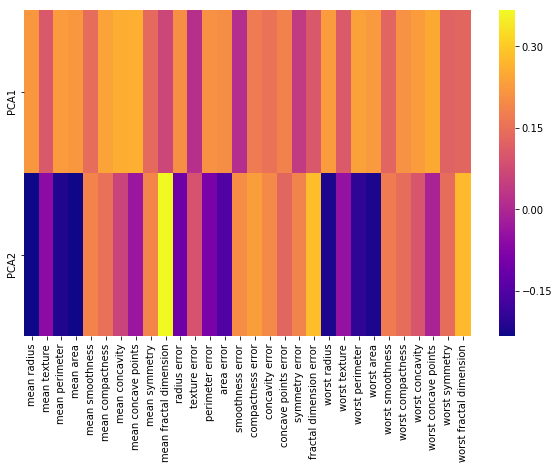

In [14]:
plt.figure(figsize = (10, 6))
sns.heatmap(pca_comp_df, cmap = 'plasma')
# Conclusion: we can see the PCA1 is highly correlated but PCA2 is not very good correlated. So n_components = 2 is sufficient.

**Visualize the data using the PCA and check how target are distributed**

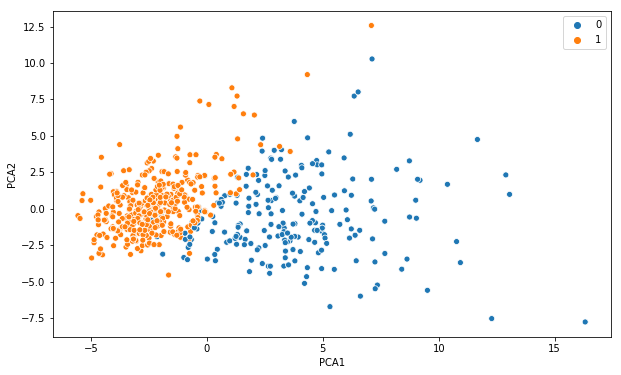

In [15]:
plt.figure(figsize = (10, 6))
plt.xlabel('PCA1')
plt.ylabel('PCA2')
sns.scatterplot(pca_df['PCA1'], pca_df['PCA2'], hue = target)
plt.legend()

**As we can see in the above visualization data can be calssified using the SVM algorithm.**

## SVM (Support Vector Machine)

In [16]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

In [17]:
x = pca_df
y = cancer['target']

In [18]:
svc = SVC()

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.3, random_state = 101)

**Tune the data using GridSearchCV to get the best C and gamma for the SVM**

In [21]:
param = {'C': range(70, 80), 'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}
cv = GridSearchCV(svc, param, cv = 4, verbose = 0)

In [22]:
cv.fit(xtrain, ytrain)

GridSearchCV(cv=4, error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': range(70, 80), 'gamma': [0.001, 0.01, 0.1, 1, 10, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [23]:
cv.best_params_
cv.best_estimator_
# we got C = 72 and gamma = 0.01

SVC(C=72, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [24]:
predict = cv.predict(xtest)

**Print the classification reports**

In [25]:
from sklearn.metrics import classification_report, confusion_matrix

In [26]:
print(classification_report(ytest, predict))
print(confusion_matrix(ytest, predict))

              precision    recall  f1-score   support

           0       0.92      0.89      0.91        66
           1       0.93      0.95      0.94       105

   micro avg       0.93      0.93      0.93       171
   macro avg       0.93      0.92      0.93       171
weighted avg       0.93      0.93      0.93       171

[[ 59   7]
 [  5 100]]


## Great!